### Half-Spin

In [1]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import matplotlib.transforms as transforms

In [2]:
N = 2                            # Length of Hilbert Space
tmin=0
tmax=10
psi0=basis(N,0)                  # Spin up
psi1=basis(N,1)                  # Spin down
psi2=psi0+psi1
psi2=psi2.unit()                 #superposition of |0>+|1>
psi3=psi0-psi1 
psi3=psi3.unit()                 #superposition of |0>-|1>
psi4=-psi0+psi1
psi4=psi4.unit()                 #superposition of -|0>+|1>
psi5=-psi0-psi1
psi5=psi5.unit()                 #superposition of -|0>-|1>

####  Only Dephasing

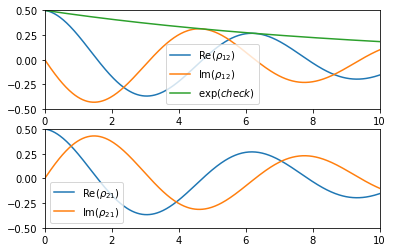

In [3]:
wl = 1                           # Angular frequency
delta_w = 0.05                  # Uncertainty
H =0.5* wl * sigmaz()            # Hamiltonion magnetic field in the z direction
C_ops = [np.sqrt(delta_w)*sigmaz()]      # Collapse Operator
times = np.linspace(tmin,tmax,400)    # Time of measurement
result = mesolve(H, psi2, times, C_ops)
plt.figure()
plt.subplot(211)
plt.ylim(-0.5, 0.5)
plt.xlim(tmin, tmax)

plt.plot(times,np.real(expect(result.states, projection(2,1,0))), label=r'Re($\rho_{12}$)');
plt.plot(times,np.imag(expect(result.states, projection(2,1,0))), label=r'Im($\rho_{12}$)' );
plt.plot(times,0.5*np.exp(-2*delta_w*times), label=r'exp($check$)');
plt.legend()
plt.subplot(212)
plt.ylim(-0.5, 0.5)
plt.xlim(tmin, tmax)
plt.plot(times,np.real(expect(result.states, projection(2,0,1))), label=r'Re($\rho_{21}$)');
plt.plot(times,np.imag(expect(result.states, projection(2,0,1))), label=r'Im($\rho_{21}$)');
plt.legend()

In [4]:
wl = 1                           # Angular frequency
delta_w = 0.15                   # Uncertainty
H = wl* 0.5*sigmaz()             # Hamiltonion
C_ops = [delta_w *sigmaz()]      # Collapse Operator

def update_ang_freq(freq):
    wl=freq
    return(wl)

def update_uncertainty(uncertainty,freq):
#    wl=update_ang_freq(freq) 
    delta_w=uncertainty*wl
    return(delta_w) 

def update_spin_up(up):      ## It Works :), it glitches at [ 0,0] which makes sense, sadly it start at [0,0]
    psi_up= up*basis(N,0)
    return(psi_up)


def update_spin_down(down,up,uncertainty,freq):
    psi_up=update_spin_up(up)
    psi_total=down*basis(N,1)+psi_up 
    psi_total=psi_total.unit()
    print(psi_total) 
    wl=update_ang_freq(freq) 
    H = wl* 0.5*sigmaz()
    delta_w=update_uncertainty(uncertainty,freq)     
    C_ops = [delta_w *sigmaz()] 
    result = mesolve(H, psi_total, times, C_ops)
    plt.figure()
    plt.subplot(211)
    plt.ylim(-0.5, 0.5)
    plt.xlim(tmin, tmax)
    plt.plot(times,np.real(expect(result.states, projection(2,1,0))), label=r'Re($\rho_{21}$)');
    plt.plot(times,np.imag(expect(result.states, projection(2,1,0))), label=r'Im($\rho_{12}$)' );
    plt.legend()
    plt.subplot(212)
    plt.ylim(-0.5, 0.5)
    plt.xlim(tmin, tmax)
    plt.plot(times,np.real(expect(result.states, projection(2,0,1))), label=r'Re($\rho_{21}$)');
    plt.plot(times,np.imag(expect(result.states, projection(2,0,1))), label=r'Im($\rho_{21}$)');
    plt.legend() 

interact(update_spin_down,freq=(0,1,0.01),uncertainty=(0,1,0.01)  ,down=(-1,1,0.01), up=(-1,1,0.01));     

interactive(children=(FloatSlider(value=0.0, description='down', max=1.0, min=-1.0, step=0.01), FloatSlider(va…

#### Decay with dephasing

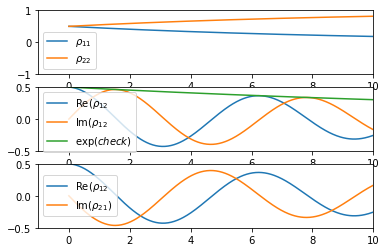

In [5]:
w = 1 
H = 0.5 * w * sigmaz()
gamma = 0.1 * wl
C_ops = [np.sqrt(gamma) * sigmam()]
result = mesolve(H, psi2, times, C_ops)
plt.figure()
plt.subplot(311)
plt.ylim(-1, 1)
plt.xlim(tmin-1, tmax)
plt.plot(times,np.real(expect(result.states, projection(2,0,0))), label=r'$\rho_{11}$');
plt.plot(times,expect(result.states, projection(2,1,1)),          label=r'$\rho_{22}$');
plt.legend()
plt.subplot(312)
plt.ylim(-0.5, 0.5)
plt.xlim(tmin-1, tmax)
plt.plot(times,np.real(expect(result.states, projection(2,0,1))), label=r'Re($\rho_{12}$');
plt.plot(times,np.imag(expect(result.states, projection(2,0,1))), label=r'Im($\rho_{12}$');
plt.plot(times,0.5*np.exp(-gamma/2*times), label=r'exp($check$)');
plt.legend() 
plt.subplot(313)
plt.ylim(-0.5, 0.5)
plt.xlim(tmin-1, tmax)
plt.plot(times,np.real(expect(result.states, projection(2,0,1))), label=r'Re($\rho_{12}$');
plt.plot(times,np.imag(expect(result.states, projection(2,1,0))), label=r'Im($\rho_{21}$)');
plt.legend() 

In [6]:
def update_spin_up(up):     
    psi_up= up*basis(N,0)
    return(psi_up)

def update_spin_down(down,up):
    psi_up=update_spin_up(up)
    psi_total=down*basis(N,1)+psi_up 
    psi_total=psi_total.unit()
    print(psi_total) 
    gamma = 0.1 * wl
    C_ops = [np.sqrt(gamma) * sigmaz()]
    result = mesolve(H, psi_total, times, C_ops)
    plt.figure()
    plt.subplot(311)
    plt.plot(times,np.real(expect(result.states, projection(2,0,0))), label=r'$\rho_{11}$');
    plt.plot(times,expect(result.states, projection(2,1,1)),          label=r'$\rho_{22}$');
    plt.legend()
    plt.subplot(312)
    plt.plot(times,np.real(expect(result.states, projection(2,0,1))), label=r'Re($\rho_{12}$');
    plt.plot(times,np.imag(expect(result.states, projection(2,0,1))), label=r'Im($\rho_{12}$');
    plt.legend() 
    plt.subplot(313)
    plt.plot(times,np.real(expect(result.states, projection(2,0,1))), label=r'Re($\rho_{12}$');
    plt.plot(times,np.imag(expect(result.states, projection(2,1,0))), label=r'Im($\rho_{21}$)');
    plt.legend() 

interact(update_spin_down,down=(-1,1,0.01), up=(-1,1,0.01));    

interactive(children=(FloatSlider(value=0.0, description='down', max=1.0, min=-1.0, step=0.01), FloatSlider(va…

####  Thermal Decoherence with dephasing

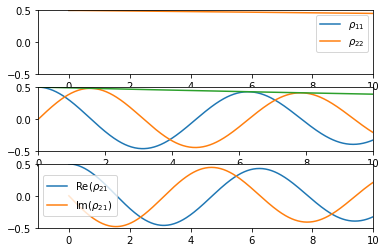

In [7]:
kb=1.38e-23
T=1000
wl = 1 
nther=1/(np.exp(wl/kb*T)-1) 
H = 0.5 * wl * sigmaz()
gamma = 0.01
gamma_plus = gamma*(1+nther)
gamma_minus = gamma*nther

C_ops = [np.sqrt(gamma_minus) * sigmam(),np.sqrt(gamma) * sigmaz(),np.sqrt(gamma_plus) * sigmap()]
result = mesolve(H,psi2 , times, C_ops)

plt.figure()
plt.subplot(311)

plt.xlim(tmin-1, tmax)
plt.ylim(-0.5, 0.5)
plt.plot(times,np.real(expect(result.states, projection(2,0,0))), label=r'$\rho_{11}$');
plt.plot(times,expect(result.states, projection(2,1,1)),          label=r'$\rho_{22}$');
plt.legend()
plt.subplot(312)

plt.xlim(tmin, tmax)
plt.ylim(-0.5, 0.5)
plt.plot(times,np.real(expect(result.states, projection(2,0,1))), label=r'Re($\rho_{12}$');
plt.plot(times,np.imag(expect(result.states, projection(2,0,1))), label=r'Im($\rho_{12}$');
plt.plot(times,0.5*np.exp(-2*(gamma +gamma_minus/2+gamma_plus/4)*times), label=r'exp($check$)');
#plt.legend() 
plt.subplot(313)

plt.xlim(tmin-1, tmax)
plt.ylim(-0.5, 0.5)
plt.plot(times,np.real(expect(result.states, projection(2,1,0))), label=r'Re($\rho_{21}$');
plt.plot(times,np.imag(expect(result.states, projection(2,1,0))), label=r'Im($\rho_{21}$)');
plt.legend() 

### Thermal Bath from a spin

In [8]:
N = 4               # number of basis states to consider
kappa = 1.0/0.129   # coupling to heat bath
nth = 0.063         # temperature with <n>=0.063 Find the one for spins

tlist = np.linspace(0,0.6,100)
# collapse operator list
c_op_list = []

a = destroy(N)      # cavity destruction operator
H = a.dag() * a     # harmonic oscillator Hamiltonian
psi0 = basis(N,1)   # initial Fock state with one photon: |1>


# decay operator
c_op_list.append(np.sqrt(kappa * (1 + nth)) * a)

# excitation operator
c_op_list.append(np.sqrt(kappa * nth) * a.dag())

# collapse operator list
c_op_list = []

# decay operator
c_op_list.append(np.sqrt(kappa * (1 + nth)) * a)

# excitation operator
c_op_list.append(np.sqrt(kappa * nth) * a.dag())

ntraj = [1, 5, 15, 904] # list of number of trajectories to avg. over
mc = mcsolve(H, psi0, tlist, c_op_list, [a.dag()*a], ntraj)
# run master equation to get ensemble average expectation values
me = mesolve(H, psi0, tlist, c_op_list, [a.dag()*a])


# collapse operator list
c_op_list = []

# decay operator
c_op_list.append(np.sqrt(kappa * (1 + nth)) * a)

# excitation operator
c_op_list.append(np.sqrt(kappa * nth) * a.dag())

ntraj = [1, 5, 15, 904] # list of number of trajectories to avg. over
mc = mcsolve(H, psi0, tlist, c_op_list, [a.dag()*a], ntraj)
# run master equation to get ensemble average expectation values
me = mesolve(H, psi0, tlist, c_op_list, [a.dag()*a])

10.1%. Run time:   3.80s. Est. time left: 00:00:00:33
20.0%. Run time:   4.24s. Est. time left: 00:00:00:16
30.1%. Run time:   4.62s. Est. time left: 00:00:00:10
40.0%. Run time:   4.98s. Est. time left: 00:00:00:07
50.0%. Run time:   5.36s. Est. time left: 00:00:00:05
60.1%. Run time:   5.78s. Est. time left: 00:00:00:03
70.0%. Run time:   6.26s. Est. time left: 00:00:00:02
80.1%. Run time:   6.71s. Est. time left: 00:00:00:01
90.0%. Run time:   7.12s. Est. time left: 00:00:00:00
100.0%. Run time:   7.50s. Est. time left: 00:00:00:00
Total run time:   7.54s
10.1%. Run time:   3.97s. Est. time left: 00:00:00:35
20.0%. Run time:   4.36s. Est. time left: 00:00:00:17
30.1%. Run time:   4.74s. Est. time left: 00:00:00:11
40.0%. Run time:   5.15s. Est. time left: 00:00:00:07
50.0%. Run time:   5.55s. Est. time left: 00:00:00:05
60.1%. Run time:   5.94s. Est. time left: 00:00:00:03
70.0%. Run time:   6.34s. Est. time left: 00:00:00:02
80.1%. Run time:   6.73s. Est. time left: 00:00:00:01
90.

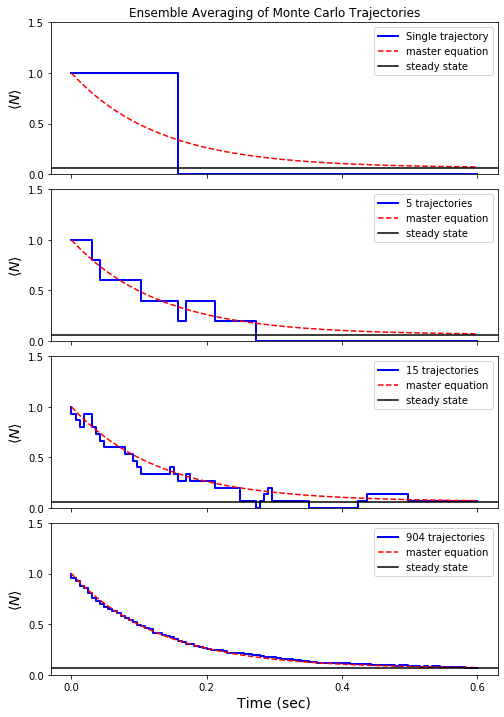

In [9]:


# calulate final state using steadystate solver
final_state = steadystate(H, c_op_list) # find steady-state
fexpt = expect(a.dag()*a, final_state)  # find expectation value for particle number
import matplotlib.font_manager
leg_prop = matplotlib.font_manager.FontProperties(size=10)

fig, axes = plt.subplots(4, 1, sharex=True, figsize=(8,12))

fig.subplots_adjust(hspace=0.1) # reduce space between plots

for idx, n in enumerate(ntraj):

    axes[idx].step(tlist, mc.expect[idx][0], 'b', lw=2)
    axes[idx].plot(tlist, me.expect[0], 'r--', lw=1.5)
    axes[idx].axhline(y=fexpt, color='k', lw=1.5)
    
    axes[idx].set_yticks(np.linspace(0, 2, 5))
    axes[idx].set_ylim([0, 1.5])
    axes[idx].set_ylabel(r'$\left<N\right>$', fontsize=14)
    
    if idx == 0:
        axes[idx].set_title("Ensemble Averaging of Monte Carlo Trajectories")
        axes[idx].legend(('Single trajectory', 'master equation', 'steady state'), prop=leg_prop)
    else:
        axes[idx].legend(('%d trajectories' % n, 'master equation', 'steady state'), prop=leg_prop)
        

axes[3].xaxis.set_major_locator(plt.MaxNLocator(4))
axes[3].set_xlabel('Time (sec)',fontsize=14);

### Thermal bath of a spin qubit

In [10]:
N = 2                            # Length of Hilbert Space
tmin=0
tmax=10
wl = 1                           # Angular frequency
delta_w = 0.05                  # Uncertainty
H =0.5* wl * sigmaz()
times = np.linspace(tmin,tmax,400)
psi0 = basis(N,1)

In [13]:
kb=1.38e-23
T=1000
wl = 1 
nther=1/(np.exp(wl/kb*T)-1) 
gamma = 0.01
gamma_plus = gamma*(1+nther)
gamma_minus = gamma*nther
C_ops_list = []

C_ops_list.append (np.sqrt(gamma_minus) * sigmam())

C_ops_list.append (np.sqrt(gamma) * sigmaz()) 

C_ops_list.append (np.sqrt(gamma_plus) * sigmap())
mc = mcsolve(H, psi0, times, C_ops_list)

10.0%. Run time:   4.08s. Est. time left: 00:00:00:36
20.0%. Run time:   4.31s. Est. time left: 00:00:00:17
30.0%. Run time:   4.55s. Est. time left: 00:00:00:10
40.0%. Run time:   4.71s. Est. time left: 00:00:00:07
50.0%. Run time:   4.90s. Est. time left: 00:00:00:04
60.0%. Run time:   5.08s. Est. time left: 00:00:00:03
70.0%. Run time:   5.27s. Est. time left: 00:00:00:02
80.0%. Run time:   5.49s. Est. time left: 00:00:00:01
90.0%. Run time:   5.67s. Est. time left: 00:00:00:00
100.0%. Run time:   5.84s. Est. time left: 00:00:00:00
Total run time:   5.93s


In [18]:
me =mesolve(H, psi0, times,  C_ops_list)
final_state = steadystate(H, C_ops_list)
# fexpt = expect( , final_state) ?


IndexError: list index out of range

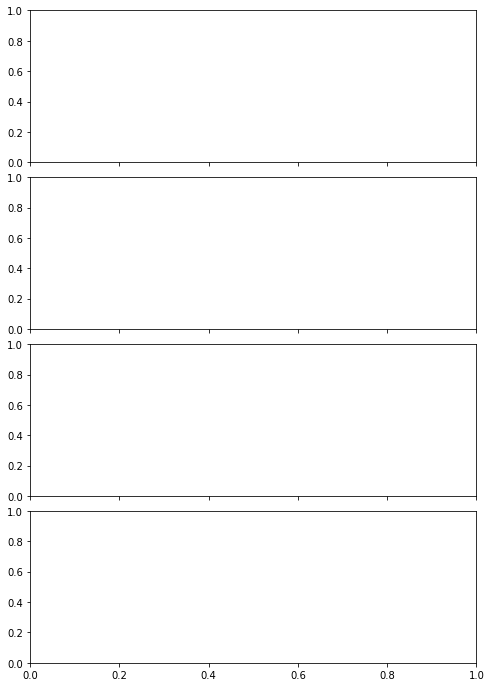

In [19]:
import matplotlib.font_manager
leg_prop = matplotlib.font_manager.FontProperties(size=10)

fig, axes = plt.subplots(4, 1, sharex=True, figsize=(8,12))

fig.subplots_adjust(hspace=0.1) # reduce space between plots

for idx, n in enumerate(ntraj):

    axes[idx].step(tlist, mc.expect[idx][0], 'b', lw=2)
    axes[idx].plot(tlist, me.expect[0], 'r--', lw=1.5)
    axes[idx].axhline(y=fexpt, color='k', lw=1.5)
    
    axes[idx].set_yticks(np.linspace(0, 2, 5))
    axes[idx].set_ylim([0, 1.5])
    axes[idx].set_ylabel(r'$\left<N\right>$', fontsize=14)
    
    if idx == 0:
        axes[idx].set_title("Ensemble Averaging of Monte Carlo Trajectories")
        axes[idx].legend(('Single trajectory', 'master equation', 'steady state'), prop=leg_prop)
    else if:
        axes[idx].legend(('%d trajectories' % n, 'master equation', 'steady state'), prop=leg_prop)
        

axes[3].xaxis.set_major_locator(plt.MaxNLocator(4))
axes[3].set_xlabel('Time (sec)',fontsize=14);